In [34]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

In [56]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

Files already downloaded and verified
Files already downloaded and verified


In [36]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

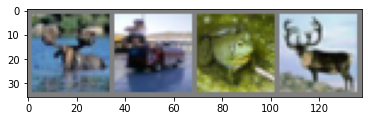

 deer truck  frog  deer


In [37]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

In [38]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [39]:
net = Net()

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [41]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / 20000))
            running_loss = 0.0

print("Finished training")

[1,  2000] loss: 0.218
[1,  4000] loss: 0.184
[1,  6000] loss: 0.168
[1,  8000] loss: 0.158
[1, 10000] loss: 0.151
[1, 12000] loss: 0.148
[2,  2000] loss: 0.138
[2,  4000] loss: 0.137
[2,  6000] loss: 0.134
[2,  8000] loss: 0.132
[2, 10000] loss: 0.129
[2, 12000] loss: 0.130
Finished training


In [42]:
PATH = "./cifar_net.pth"
torch.save(net.state_dict(), PATH)

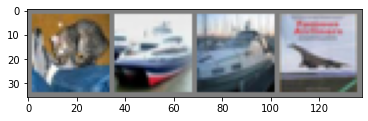

Groundtruth:    cat  ship  ship plane


In [57]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print("Groundtruth: ", " ".join("%5s" % classes[labels[j]] for j in range(4)))

In [58]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [59]:
outputs = net(images)

In [60]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat plane plane plane


In [63]:
correct = 0
total = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print("Accuracy of the network on the 10000 test images: %d %%" % (100 * correct / total))
for i in range(10):
    print("Accuracy of %5s : %2d %%" % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the network on the 10000 test images: 55 %
Accuracy of plane : 67 %
Accuracy of   car : 65 %
Accuracy of  bird : 27 %
Accuracy of   cat : 43 %
Accuracy of  deer : 59 %
Accuracy of   dog : 52 %
Accuracy of  frog : 56 %
Accuracy of horse : 64 %
Accuracy of  ship : 61 %
Accuracy of truck : 54 %
